In [7]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [8]:
#Defining 
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  # squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


In [9]:
def plot_the_model(feature, label, prediction):
    # Plot the original data
    plt.scatter(feature, label, color='blue')

    # Plot the predicted values
    plt.plot(feature, prediction, color='red')

    # Set the title and axis labels
    plt.title('Label vs. Prediction')
    plt.xlabel('Feature')
    plt.ylabel('Label')

    plt.show()

def plot_the_loss_curve(epochs, rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [10]:
#sample data
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

In [11]:
# first attempt
learning_rate = 0.2
epochs = 10
my_batch_size = 5

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)

Epoch 1/10


/Users/balazs/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


3/3 [==============================] - 0s 14ms/step - loss: 666.9950 - root_mean_squared_error: 25.8262
Epoch 2/10
3/3 [==============================] - 0s 7ms/step - loss: 284.5720 - root_mean_squared_error: 16.8693
Epoch 3/10
3/3 [==============================] - 0s 7ms/step - loss: 144.8788 - root_mean_squared_error: 12.0366
Epoch 4/10


2023-02-15 19:08:49.343313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 7ms/step - loss: 58.1499 - root_mean_squared_error: 7.6256
Epoch 5/10
3/3 [==============================] - 0s 6ms/step - loss: 29.1604 - root_mean_squared_error: 5.4000
Epoch 6/10
3/3 [==============================] - 0s 6ms/step - loss: 11.0270 - root_mean_squared_error: 3.3207
Epoch 7/10
3/3 [==============================] - 0s 8ms/step - loss: 4.0843 - root_mean_squared_error: 2.0210
Epoch 8/10
3/3 [==============================] - 0s 6ms/step - loss: 1.9870 - root_mean_squared_error: 1.4096
Epoch 9/10
3/3 [==============================] - 0s 7ms/step - loss: 1.5030 - root_mean_squared_error: 1.2260
Epoch 10/10
3/3 [==============================] - 0s 9ms/step - loss: 1.3057 - root_mean_squared_error: 1.1427


1/1 [==============================] - 0s 35ms/step


2023-02-15 19:08:49.852206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


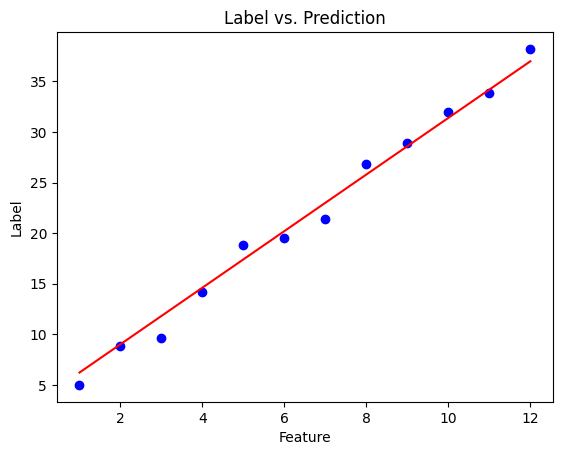

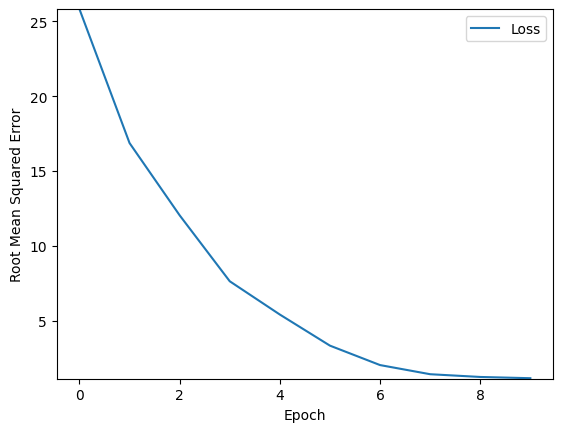

In [12]:
prediction = my_model.predict(my_feature)
plot_the_model(my_feature, my_label, prediction)
plot_the_loss_curve(epochs, rmse)